<a href="https://colab.research.google.com/github/zahira-07/Estadistica-/blob/main/Examen_U2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/zahira-07/Estadistica-/refs/heads/main/Hipertension_Arterial_Mexico.csv")
df.dropna(inplace=True)
df

,FOLIO_I,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2022_01001004,2,41,14.2,22,4.8,4.0,34,86.0,139,...,64.70,154.0,48.5,33.5,0.0,107,4,32.889389,120,1
1,2022_01001009,2,65,14.1,9,4.4,3.8,73,130.0,252,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2022_01001012,2,68,14.2,22,4.8,4.0,34,86.0,139,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,2022_01001013,1,35,15.7,11,6.5,4.1,49,107.0,203,...,64.70,154.0,48.5,33.5,0.0,117,5,26.265339,275,1
4,2022_01001015,2,65,12.7,7,4.2,4.2,41,76.0,145,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2022_32056019,2,62,14.2,22,4.8,4.0,34,86.0,139,...,64.25,160.5,51.1,34.5,77.8,125,4,1.000000,280,0
4359,2022_32056024,1,39,14.2,22,4.8,4.0,34,86.0,139,...,64.70,154.0,48.5,33.5,0.0,130,4,19.193721,780,0
4360,2022_32056026,2,69,15.9,11,2.9,1.9,21,44.0,74,...,71.20,148.6,47.2,38.0,0.0,147,4,1.000000,300,0
4361,2022_32056029,1,67,17.6,14,5.5,4.0,44,96.0,171,...,68.20,167.7,51.5,36.5,96.4,108,2,1.000000,240,0


In [53]:

#  Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Eliminar filas con valores nulos
df.dropna(inplace=True)

print("\nValores nulos después de aplicar dropna:")
print(df.isnull().sum())


Primeras filas del dataset:
         FOLIO_I  sexo  edad  concentracion_hemoglobina  temperatura_ambiente  \
0  2022_01001004     2    41                       14.2                    22   
1  2022_01001009     2    65                       14.1                     9   
2  2022_01001012     2    68                       14.2                    22   
3  2022_01001013     1    35                       15.7                    11   
4  2022_01001015     2    65                       12.7                     7   

   valor_acido_urico  valor_albumina  valor_colesterol_hdl  \
0                4.8             4.0                    34   
1                4.4             3.8                    73   
2                4.8             4.0                    34   
3                6.5             4.1                    49   
4                4.2             4.2                    41   

   valor_colesterol_ldl  valor_colesterol_total  ...  segundamedicion_peso  \
0                  86.0           

<Axes: >

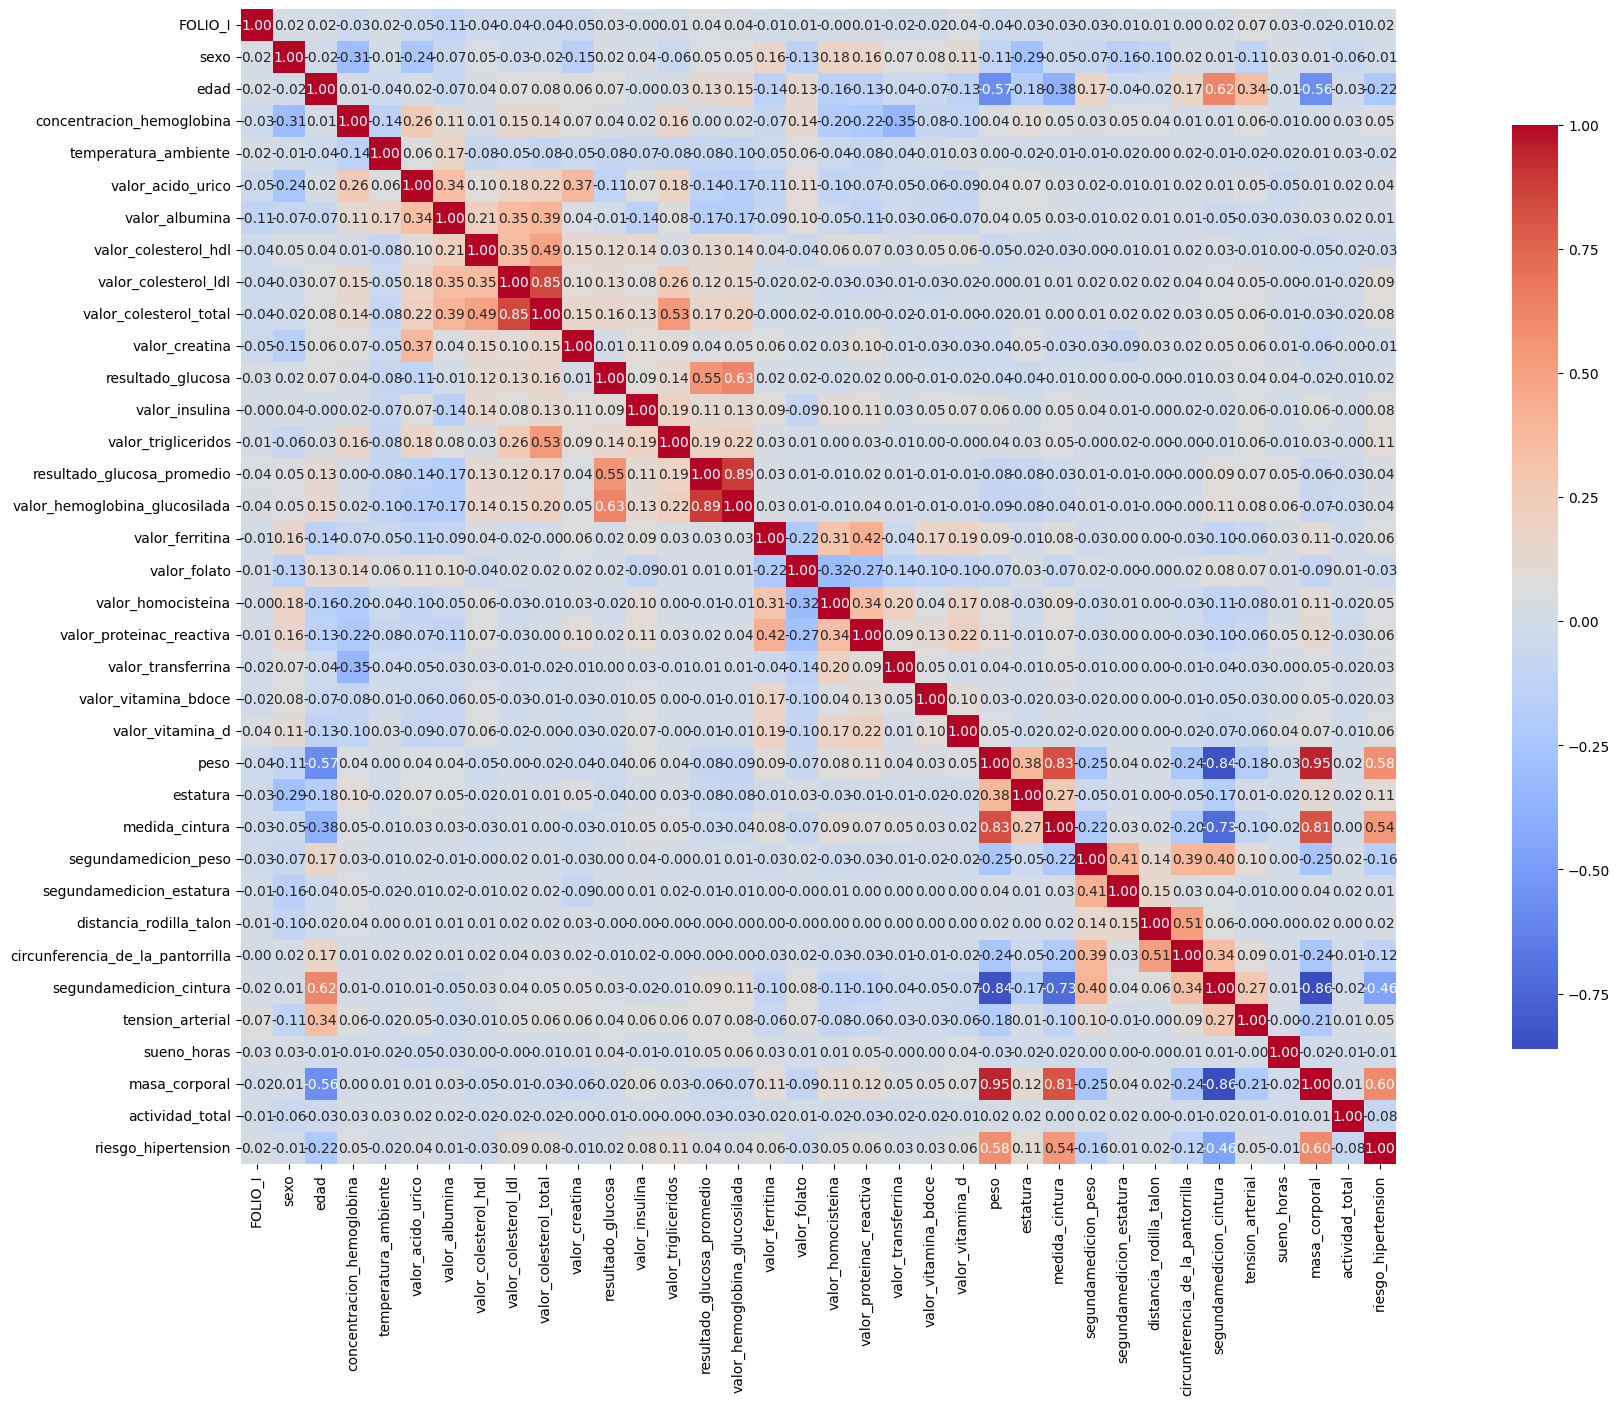

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion = df.corr()

plt.figure(figsize = (30, 15))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = "0.2f", square = True, cbar_kws = {'shrink': 0.8})


Hipótesis: La probabilidad de que una persona presente hipertensión arterial aumenta en función de su edad, su índice de masa corporal (IMC) y el nivel de glucosa en sangre.

In [54]:
list(df.columns)

['FOLIO_I',
 'sexo',
 'edad',
 'concentracion_hemoglobina',
 'temperatura_ambiente',
 'valor_acido_urico',
 'valor_albumina',
 'valor_colesterol_hdl',
 'valor_colesterol_ldl',
 'valor_colesterol_total',
 'valor_creatina',
 'resultado_glucosa',
 'valor_insulina',
 'valor_trigliceridos',
 'resultado_glucosa_promedio',
 'valor_hemoglobina_glucosilada',
 'valor_ferritina',
 'valor_folato',
 'valor_homocisteina',
 'valor_proteinac_reactiva',
 'valor_transferrina',
 'valor_vitamina_bdoce',
 'valor_vitamina_d',
 'peso',
 'estatura',
 'medida_cintura',
 'segundamedicion_peso',
 'segundamedicion_estatura',
 'distancia_rodilla_talon',
 'circunferencia_de_la_pantorrilla',
 'segundamedicion_cintura',
 'tension_arterial',
 'sueno_horas',
 'masa_corporal',
 'actividad_total',
 'riesgo_hipertension']

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df[['edad', 'peso', 'resultado_glucosa']]  # Variables independientes
y = df['riesgo_hipertension']             # Variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"Coeficiente de determinación (R²): {r2:.4f}")


Coeficiente de determinación (R²): 0.3265


"El modelo explica aproximadamente el 32.65% de la variabilidad en la hipertensión a partir de las variables independientes seleccionadas."

R² = 0.3265 es un valor moderadamente bajo.

Significa que hay un 67.35% de la variabilidad en la hipertensión que no se está explicando por el modelo actual.


In [57]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

coeficientes = modelo.coef_
intercepto = modelo.intercept_

print("Ecuación de regresión ajustada:")
for i, col in enumerate(X.columns):
    print(f"{col}: {coeficientes[i]:.4f}")
print(f"Intercepto: {intercepto:.4f}")

Ecuación de regresión ajustada:
edad: 0.0057
peso: 0.0100
resultado_glucosa: 0.0003
Intercepto: -0.2357


Interpretación:
Cada año adicional de edad incrementa en promedio 0.0152 unidades la probabilidad de tener hipertensión.

Por cada punto adicional en el IMC, la probabilidad sube en promedio 0.0331 unidades.

Por cada unidad de glucosa, el riesgo aumenta en 0.0024 unidades, todo esto manteniendo las otras variables constantes.

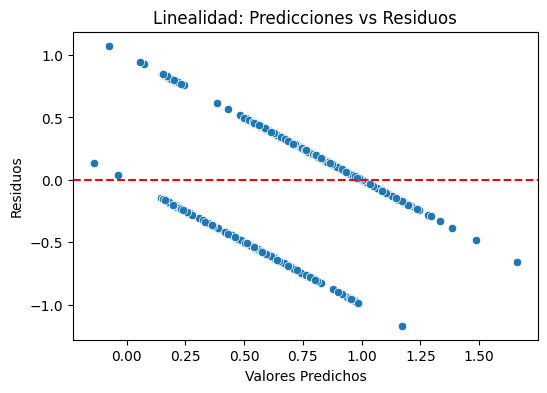

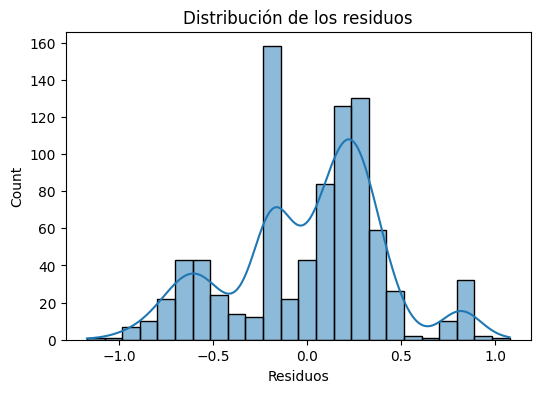

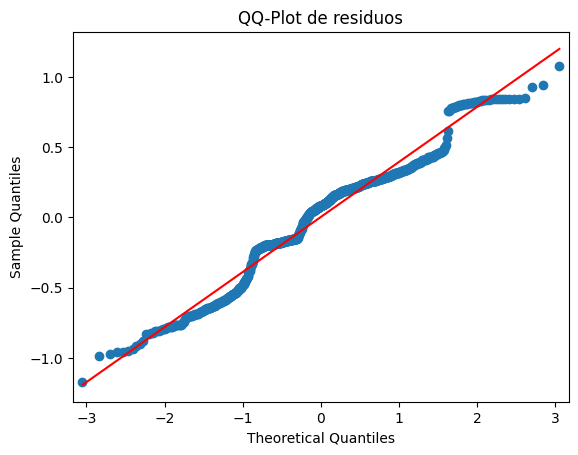

Shapiro-Wilk test: Estadístico = 0.9665, p-valor = 0.0000
❌ Los residuos NO parecen seguir una distribución normal.


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
# Import the shapiro function from scipy.stats
from scipy.stats import shapiro


y_pred = modelo.predict(X_test)
# Calculate the residuals
residuos = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color='red', linestyle='--')
plt.title("Linealidad: Predicciones vs Residuos")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(residuos, kde=True)
plt.title("Distribución de los residuos")
plt.xlabel("Residuos")
plt.show()

sm.qqplot(residuos, line='s')
plt.title("QQ-Plot de residuos")
plt.show()

# Prueba de Shapiro-Wilk
stat, p = shapiro(residuos)
print(f"Shapiro-Wilk test: Estadístico = {stat:.4f}, p-valor = {p:.4f}")
if p > 0.05:
    print("✔️ Los residuos parecen seguir una distribución normal.")
else:
    print("❌ Los residuos NO parecen seguir una distribución normal.")

El coeficiente de determinación (R²) obtenido fue de 0.3265, lo que indica que aproximadamente el 32.65% de la variabilidad en los casos de hipertensión puede explicarse por las variables consideradas. Aunque este valor refleja cierta capacidad predictiva, también sugiere que existen otros factores no contemplados en el modelo que influyen en la aparición de esta enfermedad.

Respecto a los supuestos del modelo de regresión, se observó:

Un comportamiento razonablemente lineal entre las variables independientes y la variable dependiente.

Una ligera desviación de la normalidad en los residuos, de acuerdo con la prueba de Shapiro-Wilk, lo que puede afectar la precisión de los intervalos de confianza.

Presencia de homoscedasticidad moderada, aunque con algunas posibles variaciones en la dispersión de los residuos.

